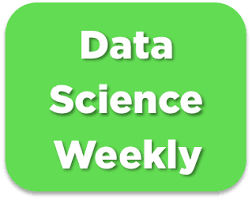

# Challenge : predict conversions 🏆🏆
In this project, you will participate to a machine learning competition like the ones that are organized by https://www.kaggle.com/. You will be able to work with jupyter notebooks as usual, but in the end you'll have to submit your model's predictions to your teacher/TA, so your model's performances will be evaluated in an independent way. The scores achieved by the different teams will be stored into a leaderboard 🏅🏅

## Description of a machine learning challenge 🚴🚴
- In machine learning challenges, the dataset is always separated into to files :
    - *data_train.csv* contains **labelled data**, which means there are both X (explanatory variables) and Y (the target to be predicted). You will use this file to train your model as usual : make the train/test split, preprocessings, assess performances, try different models, fine-tune hyperparameters etc...
    - *data_test.csv* contains "new" examples that have not be used to train the model, in the same format as in *data_train.csv* but it is **unlabeled**, which means the target Y has been removed from the file. Once you've trained a model, you will use *data_test.csv* to make some predictions that you will send to the organizing team. They will then be able to assess the performances of your model in an independent way, by preventing cheating 🤸
- Your model's predictions will be compared to the true labels and releases a leaderboard where the scores of all the teams around the world are stored
- All the participants are informed about the metric that will be used to assess the scores. You have to make sure you're using the same metric to evaluate your train/test performances !

## Company's Description 📇
www.datascienceweekly.org is a famous newsletter curated by independent data scientists. Anyone can register his/her e-mail address on this website to receive weekly news about data science and its applications !

## Project 🚧
The data scientists who created the newsletter would like to understand better the behaviour of the users visiting their website. They would like to know if it's possible to build a model that predicts if a given user will subscribe to the newsletter, by using just a few information about the user. They would like to analyze the parameters of the model to highlight features that are important to explain the behaviour of the users, and maybe discover a new lever for action to improve the newsletter's conversion rate.

They designed a competition aiming at building a model that allows to predict the *conversions* (i.e. when a user will subscribe to the newsletter). To do so, they open-sourced a dataset containing some data about the traffic on their website. To assess the rankings of the different competing teams, they decided to use the **f1-score**.

## Goals 🎯
The project can be cut into four steps :
- Part 1 : make an EDA and the preprocessings and train a baseline model with the file *data_train.csv*
- Part 2 : improve your model's f1-score on your test set (you can try feature engineering, feature selection, regularization, non-linear models, hyperparameter optimization by grid search, etc...)
- Part 3 : Once you're satisfied with your model's score, you can use it to make some predictions with the file *data_test.csv*. You will have to dump the predictions into a .csv file that will be sent to Kaggle (actually, to your teacher/TA 🤓). You can make as many submissions as you want, feel free to try different models !
- Part 4 : Take some time to analyze your best model's parameters. Are there any lever for action that would help to improve the newsletter's conversion rate ? What recommendations would you make to the team ?

## Deliverable 📬
To complete this project, your team should: 
- Create some relevant figures for EDA
- Train at least one model that predicts the conversions and evaluate its performances (f1, confusion matrices)
- Make at least one submission to the leaderboard 
- Analyze your best model's parameters and try to make some recommendations to improve the conversion rate in the future


## Helpers 🦮

To help you with the methodology, we created a template (**02-Conversion_rate_challenge_template.ipynb**) in which all the training/predictions steps are implemented for a very basic model (logistic regression with only one variable). Please use this template and feel free to change the EDA/preprocessing/training steps ! May the force be with you 🧨🧨 

# Import libraries

In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import GridSearchCV, cross_val_score

from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

from imblearn.over_sampling import SMOTENC

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
# setting Jedha color palette as default
pio.templates["jedha"] = go.layout.Template(
    layout_colorway=["#4B9AC7", "#4BE8E0", "#9DD4F3", "#97FBF6", "#2A7FAF", "#23B1AB", "#0E3449", "#015955"]
)
pio.templates.default = "jedha"
#pio.renderers.default = "svg" # to be replaced by "iframe" if working on JULIE
from IPython.display import display

# Read file with labels

In [3]:
data = pd.read_csv('conversion_data_train.csv')
print('Set with labels (our train+test) :', data.shape)

Set with labels (our train+test) : (284580, 6)


In [4]:
data.head()

,country,age,new_user,source,total_pages_visited,converted
0,China,22,1,Direct,2,0
1,UK,21,1,Ads,3,0
2,Germany,20,0,Seo,14,1
3,US,23,1,Seo,3,0
4,US,28,1,Direct,3,0


# Explore dataset

In [5]:
# Beaucoup de données : il faut créer un échantillon du dataset avant de faire une visualisation
data_sample = data.sample(10000)

In [6]:
df = data_sample.copy()

In [7]:
df.describe(include = 'all')

,country,age,new_user,source,total_pages_visited,converted
count,10000,10000.000000,10000.000000,10000,10000.000000,10000.000000
unique,4,NaN,NaN,3,NaN,NaN
top,US,NaN,NaN,Seo,NaN,NaN
freq,5593,NaN,NaN,4880,NaN,NaN
mean,NaN,30.601900,0.684000,NaN,4.857700,0.035100
std,NaN,8.291941,0.464936,NaN,3.363745,0.184042
min,NaN,17.000000,0.000000,NaN,1.000000,0.000000
25%,NaN,24.000000,0.000000,NaN,2.000000,0.000000
50%,NaN,30.000000,1.000000,NaN,4.000000,0.000000
75%,NaN,36.000000,1.000000,NaN,6.000000,0.000000


In [8]:
df['converted'].value_counts()

converted
0    9649
1     351
Name: count, dtype: int64

In [9]:
df.nunique()

country                 4
age                    49
new_user                2
source                  3
total_pages_visited    24
converted               2
dtype: int64

In [10]:
# Visualisation des dépendances par paires
fig = px.scatter_matrix(df)
fig.update_layout(
        title = go.layout.Title(text = "Bivariate analysis", x = 0.5), showlegend = False, 
            autosize=False, height=600, width = 600)
fig.show()

# Make your model

## Choose variables to use in the model, and create train and test sets
**From the EDA, we know that the most useful feature is total_pages_visited. Let's create a baseline model by using at first only this feature : in the next cells, we'll make preprocessings and train a simple (univariate) logistic regression.**

### Modèle de base : régression logistique univariée

In [10]:
features_list = ['total_pages_visited']
target_variable = 'converted'

X = data.loc[:, features_list]
y = data.loc[:, target_variable]

print("Dividing into train and test sets...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)
print("...Done.")
print()

print("Encoding categorical features and standardizing numerical features...")
numeric_transformer = Pipeline(steps=[
    ('imputer', KNNImputer()), # remplacement des valeurs manquantes par la moyenne
    ('scaler', StandardScaler(),) # on scale en dernier pour etre sur que les variables sont sur la même échelle
])
categorical_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, features_list),
])

X_train_pr = preprocessor.fit_transform(X_train)
print("...Done")
print(X_train_pr[0:5,:])
print()

print("Model training...")
logreg = LogisticRegression(C=0.5)
logreg.fit(X_train_pr, y_train)
print("Model trained!")
print()

y_train_pred = logreg.predict(X_train_pr)
X_test_pr = preprocessor.transform(X_test)
y_test_pred = logreg.predict(X_test_pr)

print("accuracy on train set : ", accuracy_score(y_train, y_train_pred))
print("accuracy on test set : ", accuracy_score(y_test, y_test_pred))
print("f1-score on train set : ", f1_score(y_train, y_train_pred))
print("f1-score on test set : ", f1_score(y_test, y_test_pred))
print()

print(classification_report(y_test, y_test_pred))

Dividing into train and test sets...
...Done.

Encoding categorical features and standardizing numerical features...
...Done
[[-1.15935344]
 [ 0.03743241]
 [-0.86015697]
 [-1.15935344]
 [ 0.03743241]]

Model training...
Model trained!

accuracy on train set :  0.9831593927893738
accuracy on test set :  0.9821491320542554
f1-score on train set :  0.6990580847723705
f1-score on test set :  0.6792929292929293

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     55080
           1       0.81      0.59      0.68      1836

    accuracy                           0.98     56916
   macro avg       0.90      0.79      0.84     56916
weighted avg       0.98      0.98      0.98     56916



### Régression logistique multivariée

In [11]:
features_list = ['age', 'total_pages_visited', 'country', 'new_user']
numeric_features = ['age', 'total_pages_visited']
categorical_features = ['country', 'new_user']
numeric_indices = [0, 1]
categorical_indices = [2, 3]
target_variable = 'converted'

X = data.loc[:, features_list]
y = data.loc[:, target_variable]

print("Dividing into train and test sets...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)
print("...Done.")
print()

print("Encoding categorical features and standardizing numerical features...")
numeric_transformer = Pipeline(steps=[
    ('imputer', KNNImputer()), # remplacement des valeurs manquantes par la moyenne
    ('scaler', StandardScaler(),) # on scale en dernier pour etre sur que les variables sont sur la même échelle
])
categorical_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
])

X_train_pr = preprocessor.fit_transform(X_train)
print("...Done")
print(X_train_pr[0:5,:])

Dividing into train and test sets...
...Done.

Encoding categorical features and standardizing numerical features...
...Done
[[-1.3990984  -1.15935344  0.          0.          0.          1.        ]
 [ 0.29299544  0.03743241  0.          0.          1.          1.        ]
 [ 2.46854467 -0.86015697  0.          0.          1.          1.        ]
 [-1.64082609 -1.15935344  0.          0.          0.          0.        ]
 [-0.31132378  0.03743241  0.          0.          0.          1.        ]]


In [12]:
print("Model training...")
logreg = LogisticRegression(C=0.5)
logreg.fit(X_train_pr, y_train)
print("Model trained!")
print()

y_train_pred = logreg.predict(X_train_pr)
X_test_pr = preprocessor.transform(X_test)
y_test_pred = logreg.predict(X_test_pr)

print("accuracy on train set : ", accuracy_score(y_train, y_train_pred))
print("accuracy on test set : ", accuracy_score(y_test, y_test_pred))
print("f1-score on train set : ", f1_score(y_train, y_train_pred))
print("f1-score on test set : ", f1_score(y_test, y_test_pred))
print()

print(classification_report(y_test, y_test_pred))

Model training...
Model trained!

accuracy on train set :  0.9862824161922834
accuracy on test set :  0.9856279429334458
f1-score on train set :  0.7644263408010862
f1-score on test set :  0.7530193236714976

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     55080
           1       0.84      0.68      0.75      1836

    accuracy                           0.99     56916
   macro avg       0.92      0.84      0.87     56916
weighted avg       0.98      0.99      0.98     56916



### Modèle AdaBoost (boosting)

In [13]:
print("Model training...")
logreg2 = LogisticRegression()
adaboost = AdaBoostClassifier(estimator=logreg2)
params = {
    "estimator__C": [0.1, 1, 2, 5],  # préfixe estimator__ car C est un paramètre de LogisticRegression
    "n_estimators": [25, 50, 100],  # n_estimators est un hyperparamètre
    "algorithm": ['SAMME']
}
adagrid = GridSearchCV(
    adaboost, param_grid=params, cv=3, scoring='f1'
)  # cv = nombre de découpages pour la CV
adagrid.fit(X_train_pr, y_train)
print("Model trained!")
print()

print("Best hyperparameters : ", adagrid.best_params_)
print("Best validation score : ", adagrid.best_score_)
print()

y_train_pred = adagrid.predict(X_train_pr)
X_test_pr = preprocessor.transform(X_test)
y_test_pred = adagrid.predict(X_test_pr)

print("accuracy on train set : ", accuracy_score(y_train, y_train_pred))
print("accuracy on test set : ", accuracy_score(y_test, y_test_pred))
print("f1-score on train set : ", f1_score(y_train, y_train_pred))
print("f1-score on test set : ", f1_score(y_test, y_test_pred))
print()

print(classification_report(y_test, y_test_pred))

Model training...
Model trained!

Best hyperparameters :  {'algorithm': 'SAMME', 'estimator__C': 2, 'n_estimators': 25}
Best validation score :  0.6892800466902549

accuracy on train set :  0.9763950383020592
accuracy on test set :  0.9758415911167334
f1-score on train set :  0.6919284567759688
f1-score on test set :  0.6882793017456359

              precision    recall  f1-score   support

           0       0.99      0.98      0.99     55080
           1       0.59      0.83      0.69      1836

    accuracy                           0.98     56916
   macro avg       0.79      0.90      0.84     56916
weighted avg       0.98      0.98      0.98     56916



### Modèle XGBoost

In [14]:
features_list = ['age', 'total_pages_visited', 'country', 'new_user']
numeric_features = ['age', 'total_pages_visited']
categorical_features = ['country', 'new_user']
numeric_indices = [0, 1]
categorical_indices = [2, 3]
target_variable = 'converted'

X = data.loc[:, features_list]
y = data.loc[:, target_variable]

print("Dividing into train and test sets...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)
print("...Done.")
print()

print("Encoding categorical features and standardizing numerical features...")
numeric_transformer = Pipeline(steps=[
    ('imputer', KNNImputer()), # remplacement des valeurs manquantes par la moyenne
    ('scaler', StandardScaler(),) # on scale en dernier pour etre sur que les variables sont sur la même échelle
])
categorical_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
])

X_train_pr = preprocessor.fit_transform(X_train)
print("...Done")
print(X_train_pr[0:5,:])

Dividing into train and test sets...
...Done.

Encoding categorical features and standardizing numerical features...
...Done
[[-1.3990984  -1.15935344  0.          0.          0.          1.        ]
 [ 0.29299544  0.03743241  0.          0.          1.          1.        ]
 [ 2.46854467 -0.86015697  0.          0.          1.          1.        ]
 [-1.64082609 -1.15935344  0.          0.          0.          0.        ]
 [-0.31132378  0.03743241  0.          0.          0.          1.        ]]


In [15]:
print("Model training...")
xgboost = XGBClassifier()
params = {
    "max_depth": [2, 6, 10, 15],
    "min_child_weight": [1, 2, 3, 4, 5, 6],
    "n_estimators": [4, 8, 12, 16, 20]
}
xggrid = GridSearchCV(
    xgboost, param_grid=params, cv=3, scoring='f1'
)  # cv = nombre de découpages pour la CV
xggrid.fit(X_train_pr, y_train)
print("Model trained!")
print()

print("Best hyperparameters : ", xggrid.best_params_)
print("Best validation score : ", xggrid.best_score_)
print()

y_train_pred = xggrid.predict(X_train_pr)
X_test_pr = preprocessor.transform(X_test)
y_test_pred = xggrid.predict(X_test_pr)

print("accuracy on train set : ", accuracy_score(y_train, y_train_pred))
print("accuracy on test set : ", accuracy_score(y_test, y_test_pred))
print("f1-score on train set : ", f1_score(y_train, y_train_pred))
print("f1-score on test set : ", f1_score(y_test, y_test_pred))
print()

print(classification_report(y_test, y_test_pred))

Model training...
Model trained!

Best hyperparameters :  {'max_depth': 6, 'min_child_weight': 5, 'n_estimators': 20}
Best validation score :  0.7647430141185714

accuracy on train set :  0.9864932532152646
accuracy on test set :  0.9851886991355682
f1-score on train set :  0.7708473060585737
f1-score on test set :  0.7490324501339685

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     55080
           1       0.83      0.69      0.75      1836

    accuracy                           0.99     56916
   macro avg       0.91      0.84      0.87     56916
weighted avg       0.98      0.99      0.98     56916



### Bagging

In [16]:
features_list = ['age', 'total_pages_visited', 'country', 'new_user']
numeric_features = ['age', 'total_pages_visited']
categorical_features = ['country', 'new_user']
numeric_indices = [0, 1]
categorical_indices = [2, 3]
target_variable = 'converted'

X = data.loc[:, features_list]
y = data.loc[:, target_variable]

print("Dividing into train and test sets...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)
print("...Done.")
print()

print("Encoding categorical features and standardizing numerical features...")
numeric_transformer = Pipeline(steps=[
    ('imputer', KNNImputer()), # remplacement par la moyenne
    ('scaler', StandardScaler(),) # on scale en dernier pour etre sur que les variables sont sur la même échelle
])
categorical_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
])

X_train_pr = preprocessor.fit_transform(X_train)
print("...Done")
print(X_train_pr[0:5,:])

Dividing into train and test sets...
...Done.

Encoding categorical features and standardizing numerical features...
...Done
[[-1.3990984  -1.15935344  0.          0.          0.          1.        ]
 [ 0.29299544  0.03743241  0.          0.          1.          1.        ]
 [ 2.46854467 -0.86015697  0.          0.          1.          1.        ]
 [-1.64082609 -1.15935344  0.          0.          0.          0.        ]
 [-0.31132378  0.03743241  0.          0.          0.          1.        ]]


In [17]:
print("Model training...")
logreg2 = LogisticRegression()
bag = BaggingClassifier(estimator=logreg2)

# Grilles de valeurs à tester
params = {
    "estimator__C": [0.1, 0.5, 1., 5.],  # préfixe estimator__ car C est un paramètre de LogisticRegression
    "n_estimators": [5, 20, 30, 50],  # même rôle que dans scikit-learn
}
print(params)
baggrid = GridSearchCV(
    bag, param_grid=params, cv=3, scoring='f1'
)  # cv = nombre de découpages pour la CV
baggrid.fit(X_train_pr, y_train)
print("Model trained!")
print()

print("Best hyperparameters : ", baggrid.best_params_)
print("Best validation score : ", baggrid.best_score_)
print()

y_train_pred = baggrid.predict(X_train_pr)
X_test_pr = preprocessor.transform(X_test)
y_test_pred = baggrid.predict(X_test_pr)

print("accuracy on train set : ", accuracy_score(y_train, y_train_pred))
print("accuracy on test set : ", accuracy_score(y_test, y_test_pred))
print("f1-score on train set : ", f1_score(y_train, y_train_pred))
print("f1-score on test set : ", f1_score(y_test, y_test_pred))
print()

print(classification_report(y_test, y_test_pred))

Model training...
{'estimator__C': [0.1, 0.5, 1.0, 5.0], 'n_estimators': [5, 20, 30, 50]}
Model trained!

Best hyperparameters :  {'estimator__C': 0.5, 'n_estimators': 5}
Best validation score :  0.7648787412457461

accuracy on train set :  0.9862736313163258
accuracy on test set :  0.9856279429334458
f1-score on train set :  0.7641331421239339
f1-score on test set :  0.7528700906344411

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     55080
           1       0.85      0.68      0.75      1836

    accuracy                           0.99     56916
   macro avg       0.92      0.84      0.87     56916
weighted avg       0.98      0.99      0.98     56916



### Bilan (F1-score)

In [23]:
bilan = pd.DataFrame({
    'model': ['baseline', 'reglog', 'adaboost', 'xgboost', 'bagging'],
    'F1 (train)': [0.699, 0.764, 0.692, 0.771, 0.764],
    'F1 (test)': [0.679, 0.753, 0.688, 0.749, 0.752]
})
bilan

,model,F1 (train),F1 (test)
0,baseline,0.699,0.679
1,reglog,0.764,0.753
2,adaboost,0.692,0.688
3,xgboost,0.771,0.749
4,bagging,0.764,0.752


# Train best classifier on all data and use it to make predictions on X_without_labels
**Before making predictions on the file conversion_data_test.csv, let's train our model on ALL the data that was in conversion_data_train.csv. Sometimes, this allows to make tiny improvements in the score because we're using more examples to train the model.**

In [24]:
X = np.append(X_train_pr,X_test_pr,axis=0)
Y = np.append(y_train,y_test)

logreg.fit(X,Y)

LogisticRegression(C=0.5)

In [20]:
# Lecture des données sans les labels
data_without_labels = pd.read_csv('conversion_data_test.csv')
print('Prediction set (without labels) :', data_without_labels.shape)

# Warning : check consistency of features_list (must be the same than the features 
# used by your best classifier)
X_without_labels = data_without_labels.loc[:, features_list]

# Conversion des DataFrames Pandas en numpy arrays avant d'utiliser scikit-learn
print("Convert pandas DataFrames to numpy arrays...")
X_without_labels = X_without_labels.values
print("...Done")

print(X_without_labels[0:5,:])

Prediction set (without labels) : (31620, 5)
Convert pandas DataFrames to numpy arrays...
...Done
[[28 16 'UK' 0]
 [22 5 'UK' 1]
 [32 1 'China' 1]
 [32 6 'US' 1]
 [25 3 'China' 0]]


In [21]:
# WARNING : PUT HERE THE SAME PREPROCESSING AS FOR YOUR TEST SET
# CHECK YOU ARE USING X_without_labels
print("Encoding categorical features and standardizing numerical features...")

X_without_labels = preprocessor.transform(pd.DataFrame(X_without_labels,columns=features_list))
print("...Done")
print(X_without_labels[0:5,:])

Encoding categorical features and standardizing numerical features...
...Done
[[-0.31132378  3.3285935   0.          1.          0.          0.        ]
 [-1.03650686  0.03743241  0.          1.          0.          1.        ]
 [ 0.1721316  -1.15935344  0.          0.          0.          1.        ]
 [ 0.1721316   0.33662888  0.          0.          1.          1.        ]
 [-0.67391532 -0.56096051  0.          0.          0.          0.        ]]


In [25]:
# Make predictions and dump to file
# WARNING : MAKE SURE THE FILE IS A CSV WITH ONE COLUMN NAMED 'converted' AND NO INDEX !
# WARNING : FILE NAME MUST HAVE FORMAT 'conversion_data_test_predictions_[name].csv'
# where [name] is the name of your team/model separated by a '-'
# For example : [name] = AURELIE-model1
data = {
    'converted': logreg.predict(X_without_labels)
}

y_predictions = pd.DataFrame(columns=['converted'], data=data)
y_predictions.to_csv('conversion_data_test_predictions_logreg.csv', index=False)


# Analyze of the best models parameters and recommendations

In [33]:
best_model = logreg

feature_importances = [(feature, coef) for feature, coef in zip(features_list, best_model.coef_[0])]
sorted_feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)

print("Importance des caractéristiques :")
for feature, coef in sorted_feature_importances:
    print(f"{feature}: {coef}")

Importance des caractéristiques :
country: 3.5223121672942
new_user: 3.345783414962735
total_pages_visited: 2.513961901790616
age: -0.5953022408892502


## Recommandations

On remarque que certaines features sont plus importantes que d'autres. D'après ces calculs, le choix du pays et le fait que ce soit un nouvel utilisateur sont les features qui ont le plus de poids dans la conversion.

Il faudrait donc concentrer les actions d'amélioration sur les pays où il y a les plus hauts taux de conversion, et sur les nouveaux utilisateurs.